# MP/BME 573: Homework Set 6 (Recon template)

In [11]:
## MP 573 HW6
##
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
from scipy import signal
import scipy.io as sio
import scipy.optimize as opt
import numpy.random as rnd
import scipy.sparse as sparse

font = {'weight' : 'normal',
        'size'   : 20}

In [12]:
# Fitting 1/2[|| Fx - d ||^2 + lambda ||Cx||^2]
# 1/2 || [F;sqrt(lambda)C]x - [d;0] ||^2
# This function returns the value and gradient of our cost function
# Note the 1/2 factor, to keep consistent with the CG notation presented in HW2
def evalGradients2(x,N,data,m,lam,D2,w):
    # x: current guess for image
    # N: dimensions of image
    # data: measured data vector ("b" in the posted hw)
    # m: Fourier space sampling mask
    # lam: regularization parameter lambda (0 for no regularization in problem 1)
    # D2: huge sparse matrix that calculates 2D finite differences (problems 2-3)
    # w: map of weights for regularization (problem 3)
    
    
    # Suggestion for output: 
    # This function should return the value f and gradient vector g
    # As needed by SD as well as CG



_IncompleteInputError: incomplete input (3435045841.py, line 18)

In [ ]:
import os


WHICH_PROBLEM = 1
if WHICH_PROBLEM == 1:

    check_file = os.path.isfile('data/hw6_recon_problem1.mat')
    if check_file == False:
        !wget https://github.com/dherarr/mp573_2025/raw/main/data/hw6_recon_problem1.mat?raw=true
        !mkdir data
        !mv hw6_recon_problem1.mat\?raw\=true data/hw6_recon_problem1.mat

    mat_contents = sio.loadmat('./data/hw6_recon_problem1.mat')
    data = mat_contents['b']
    m = mat_contents['m']
    N1 = int(np.sqrt(m.size))
    N2 = N1
    w = np.ones((N1,N2))
    lam = 0
elif WHICH_PROBLEM == 2:
    check_file = os.path.isfile('data/hw6_recon_problem2.mat')
    if check_file == False:
        !wget https://github.com/dherarr/mp573_2025/raw/main/data/hw6_recon_problem2.mat?raw=true
        !mkdir data
        !mv hw6_recon_problem2.mat\?raw\=true data/hw6_recon_problem2.mat
        
        
    mat_contents = sio.loadmat('./data/hw6_recon_problem2.mat')
    data = mat_contents['b']
    m = mat_contents['m']
    N1 = int(np.sqrt(m.size))
    N2 = N1
    w = np.ones((N1,N2))    
    lam = 1E6 # Need to test several values of lam per the posted problem
else: # if WHICH_PROBLEM == 3:
    check_file = os.path.isfile('data/hw6_recon_problem3.mat')
    if check_file == False:
        !wget https://github.com/dherarr/mp573_2025/raw/main/data/hw6_recon_problem3.mat?raw=true
        !mkdir data
        !mv hw6_recon_problem3.mat\?raw\=true data/hw6_recon_problem3.mat

    mat_contents = sio.loadmat('./data/hw6_recon_problem3.mat')
    data = mat_contents['b']
    m = mat_contents['m']
    N1 = int(np.sqrt(m.size))
    N2 = N1
    w = mat_contents['w'] 
    lam = 1E4 # Need to test several values of lam per the posted problem

m = m>0 # Make sure this is boolean
niter = 50 # Number of overall descent iterations
niterGS = 40 # Number of golden section search iterations within each SD iteration
INIT_ZEROFILLED = 0 # We may consider starting each algorithm from all zeros or from the zero-filled solution below

wvec = np.reshape(w,(N1*N2,1)) # Reshaping the weights as a vector for later use

# Here's a finite-difference taking matrix (D2)
I = np.eye(N1)
D = 2*I - np.roll(I,-1,axis=1) - np.roll(I,1,axis=1)
D = sparse.csr_matrix(D) 
I = sparse.eye(N1)
D2 = sparse.kron(D,I) + sparse.kron(I,D) 

IndentationError: unindent does not match any outer indentation level (<string>, line 27)

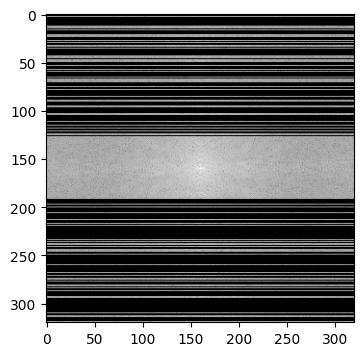

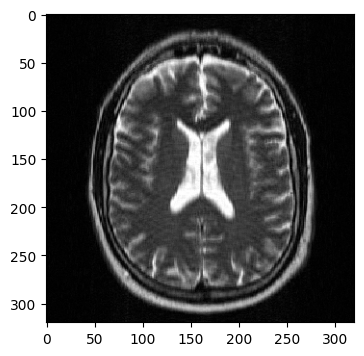

In [15]:
# Zero-filled solution
fx1 = np.zeros((N1*N2,1),dtype='complex') 
fx1[np.reshape(m,(N1*N2))] = data
fx1 = np.reshape(fx1,(N1,N2))
x1 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fx1)))

plt.figure(figsize=(4,4))
imgplot = plt.imshow(np.log(0.00001 + abs(np.reshape(fx1,(N1,N2)))).T,cmap='gray')
plt.figure(figsize=(4,4))
imgplot = plt.imshow(abs(np.reshape(x1,(N1,N2))).T,cmap='gray',vmin=0,vmax=1)

In [16]:
print('Algorithm: Steepest Descent')

# Implement SD here, show resulting image (magnitude), 
# and plot evolution of f with iterations

Algorithm: Steepest Descent


In [17]:
print('Algorithm: Conjugate Gradients')

# Implement CG here, show resulting image (magnitude), 
# and plot evolution of f with iterations 

Algorithm: Conjugate Gradients
